In [59]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px

In [60]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix , roc_curve,roc_auc_score

In [61]:
df = pd.read_csv('diabetes_prediction_dataset.csv')

## **Exploratory Data Analysis (EDA)**

### **Data Representaion**

In [62]:
df.head()

gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0

##### **Information about the DataSet**

**Total Columns** : 9

**There is No Missing Values**  

*Data types*

4 integer columns  
3 float columns  
2 categorical columns

In [63]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


#### **Descriptive Statistics**

**Statistics of the Numerical Columns**

In [65]:
df.describe()

age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194593       6.636783   
min         0.080000       0.00000       0.000000      10.010000   
25%        24.000000       0.00000       0.000000      23.630000   
50%        43.000000       0.00000       0.000000      27.320000   
75%        60.000000       0.00000       0.000000      29.580000   
max        80.000000       1.00000       1.000000      95.690000   

         HbA1c_level  blood_glucose_level       diabetes  
count  100000.000000        100000.000000  100000.000000  
mean        5.527507           138.058060       0.085000  
std         1.070672            40.708136       0.278883  
min         3.500000            80.000000       0.000000  
25%         4.800000           100.000000       0.000000  
50%         5.800000           140.000000       0.000000  
75%         6.200000           159.000000       0.000000  
max         9.000000           300.000000       1.000000

**Total Count of Diabetes Cases and it's Percentage**

In [66]:
diabetes_count = df["diabetes"].value_counts()
diabetes_Percentage = df["diabetes"].value_counts(normalize=True) * 100

frequency_table = pd.DataFrame({"Count": diabetes_count, "Percentage% ": diabetes_Percentage})
frequency_table.index = ["No Diabetes", "Diabetes"]
frequency_table

Count  Percentage% 
No Diabetes  91500          91.5
Diabetes      8500           8.5

**The Correlation Between every Numerical Column**

In [67]:
numerical_df = df.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()
correlation_matrix.round(2)

age  hypertension  heart_disease   bmi  HbA1c_level  \
age                  1.00          0.25           0.23  0.34         0.10   
hypertension         0.25          1.00           0.12  0.15         0.08   
heart_disease        0.23          0.12           1.00  0.06         0.07   
bmi                  0.34          0.15           0.06  1.00         0.08   
HbA1c_level          0.10          0.08           0.07  0.08         1.00   
blood_glucose_level  0.11          0.08           0.07  0.09         0.17   
diabetes             0.26          0.20           0.17  0.21         0.40   

                     blood_glucose_level  diabetes  
age                                 0.11      0.26  
hypertension                        0.08      0.20  
heart_disease                       0.07      0.17  
bmi                                 0.09      0.21  
HbA1c_level                         0.17      0.40  
blood_glucose_level                 1.00      0.42  
diabetes                            0.42      1.00

### **Data Wrangling**

**Dropping the Duplications**

In [68]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

**Number of Unique Values in every Column**

In [69]:
df.nunique()

gender                    3
age                     102
hypertension              2
heart_disease             2
smoking_history           6
bmi                    4247
HbA1c_level              18
blood_glucose_level      18
diabetes                  2
dtype: int64

In [70]:
df = df[df["gender"] != "Other"]

In [71]:
df["gender"].value_counts()

gender
Female    56161
Male      39967
Name: count, dtype: int64

In [72]:
df[df['bmi'] > 50].shape[0]

778

In [73]:
df=df[df['bmi'] < 50]

### **Univariant Analysis**

In [74]:
num_bins = df['age'].nunique()
fig = px.histogram(df,
                   x='age',
                   marginal='box',  
                   color_discrete_sequence=['green'],
                   nbins=num_bins,  
                   title='Age Distribution of Individuals')
fig.update_layout(
    bargap=0.1,
    yaxis_title="Number of Individuals",
    xaxis_title="Age",
    title_x=0.5,
    title_y=0.95,
    title_font=dict(size=25, color='black'),
)
fig.show()

Text(0.5, 1.0, 'Gender Count')

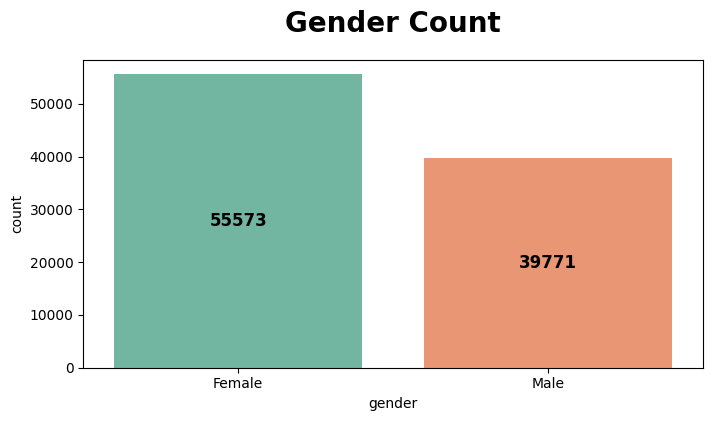

In [75]:
plt.figure(figsize=(8, 4))
ax= sns.countplot(
    x="gender", 
    data=df, 
    palette='Set2',
    hue="gender",
)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='center', fontsize=12,fontweight="black")
    
plt.title("Gender Count",fontweight="black",size=20,pad=20)

**The Number of Female in more than Male In this DataSet**

Text(0.5, 1.0, 'Smoking History Count')

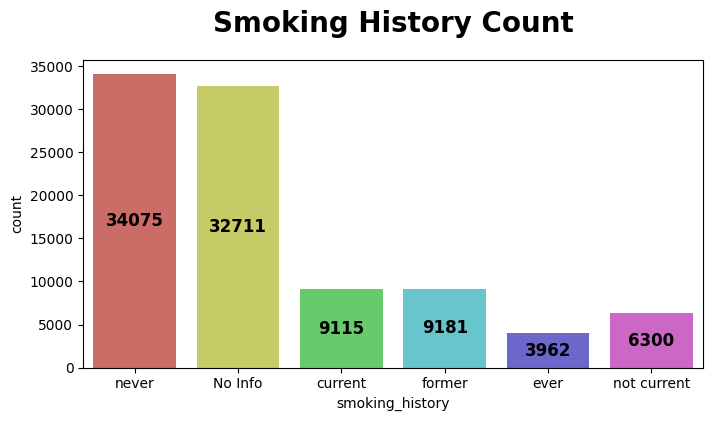

In [76]:
plt.figure(figsize=(8, 4))
ax = sns.countplot(
    x="smoking_history", 
    data=df, 
    palette='hls',
    hue="smoking_history"
    )
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='center', fontsize=12,fontweight="black")
    
plt.title("Smoking History Count",fontweight="black",size=20,pad=20)

In [77]:
plt.figure(figsize=(8, 4))
fig = px.box(
    df,
    x='blood_glucose_level',
    color_discrete_sequence=['blue'],
    title='Blood Glucose Level Distribution'
             )
fig.update_layout(
    bargap=0.1,
    xaxis_title="blood_glucose_level",
    title_x=0.5,
    title_y=0.95,
    title_font=dict(size=25, color='black'),
)
fig.show()

<Figure size 800x400 with 0 Axes>

**There are some people that have a Blood Glucose Level that are more than 250 mg/dl Which is Dangerously High**

Text(0, 0.5, 'Count')

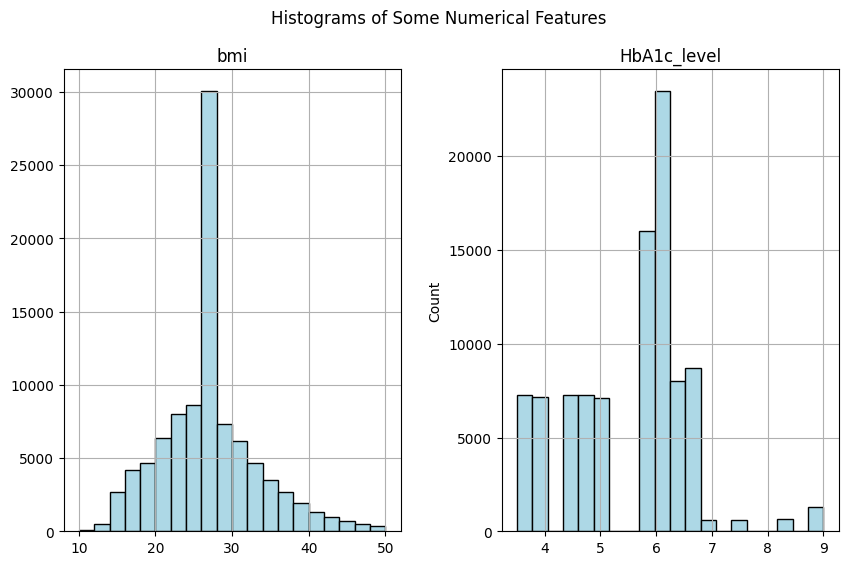

In [78]:
num_cols = ['bmi', 'HbA1c_level']
df[num_cols].hist(
    bins=20, 
    figsize=(10, 6), 
    color='lightBlue', 
    edgecolor='black'
    )
plt.suptitle('Histograms of Some Numerical Features')
plt.ylabel('Count')

In [79]:
df["bmi"].value_counts()

bmi
27.32    21659
23.00      103
27.12      101
27.80      100
24.96      100
         ...  
13.24        1
42.84        1
41.87        1
43.52        1
13.62        1
Name: count, Length: 3712, dtype: int64

**The Normal value for BMI is about 27.32**

### **Bivariate Analysis**

Text(0.5, 1.0, 'Diabetes By Gender')

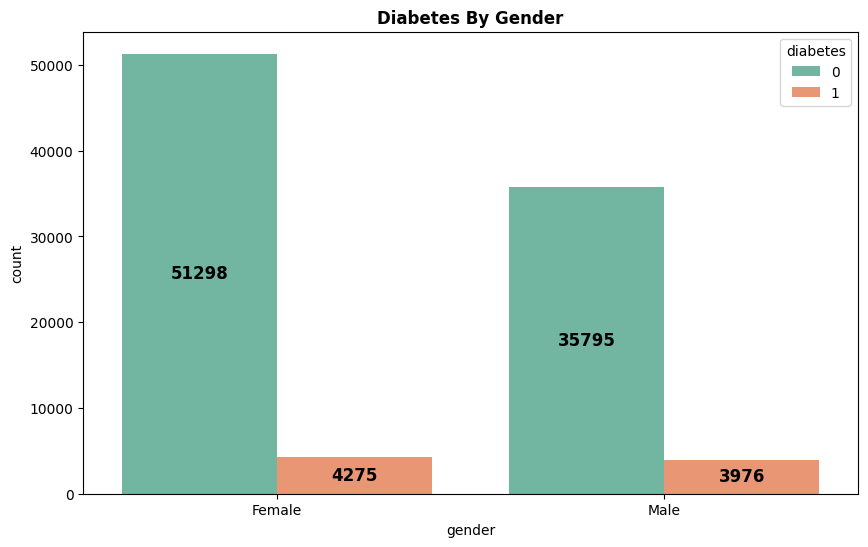

In [80]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(
    x="gender", 
    data=df, 
    palette="Set2", 
    hue="diabetes"
    )
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='center', fontsize=12,fontweight="black")
plt.title("Diabetes By Gender",fontweight="black")

**We see that both genders have roughly the same number of people who have diabetes**

In [81]:
plt.figure(figsize=(8, 5))
fig = px.box(
    df,
    x='age',
    color='diabetes',
    title='Blood Glucose Level Distribution'
             )
fig.update_layout(
    bargap=0.1,
    xaxis_title="Age",
    title_x=0.5,
    title_y=0.95,
    title_font=dict(size=25, color='black'),
)
fig.show()


<Figure size 800x500 with 0 Axes>

**From This plot we see that the Older people get The Higher chance they will have diabetes but there is some outliers of younger People who have diabetes based on Some Conditions like Genetic Mutations**

Text(0.5, 1.0, 'Smoking History by Diabetes Status')

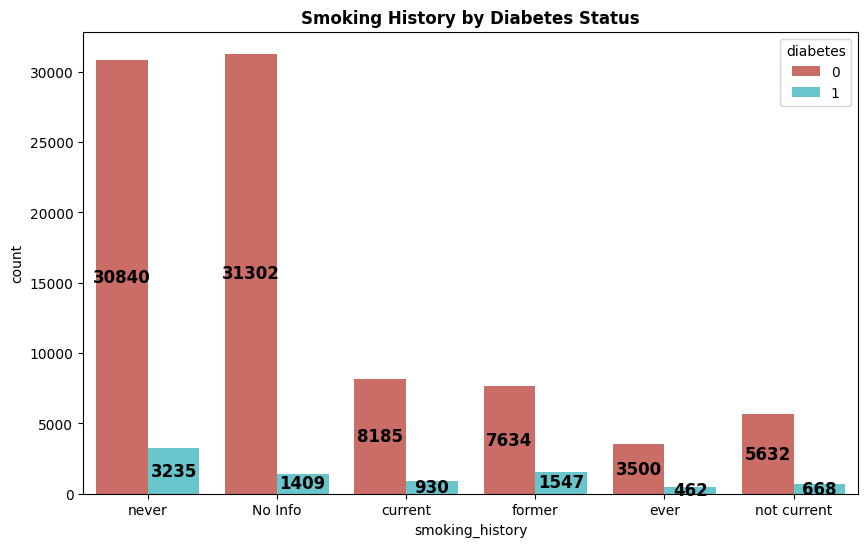

In [82]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(
    x="smoking_history", 
    data=df, 
    palette="hls", 
    hue="diabetes"
    )

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='center', fontsize=12,fontweight="black")
plt.title("Smoking History by Diabetes Status",fontweight="black")

**Most of the People That have diabetes doesn't Smoke so smoking doesn't have effection on having diabetes**

Text(0, 0.5, 'Density')

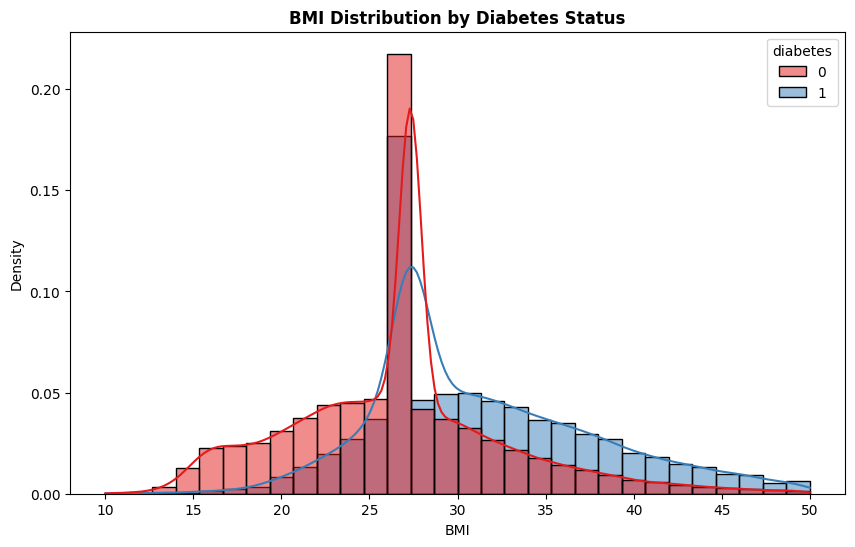

In [83]:
plt.figure(figsize=(10, 6))
sns.histplot(
    data=df, 
    x='bmi', 
    hue='diabetes', 
    kde=True, 
    stat="density", 
    common_norm=False, 
    palette='Set1', 
    bins=30
    )
plt.title("BMI Distribution by Diabetes Status",fontweight="black")
plt.xlabel("BMI")
plt.ylabel("Density")

In [84]:
fig = px.scatter(df, 
                 x='age', 
                 y='bmi', 
                 color='diabetes',
                 title='BMI vs Age (Colored by Diabetes)',
                 labels={'bmi': 'Body Mass Index', 'age': 'Age'},
                 opacity=0.8)

fig.update_layout(xaxis_title="Age", yaxis_title="BMI")
fig.show()

**The Higher BMI of a Person The Higher Chance of having Diabetes ,Most People with Diabetes their BMI is above 27.32**

In [85]:
fig = px.histogram(df,
                   x='age',  
                   color='hypertension',  
                   barmode='group',
                   title='Age Distribution by Hypertension Status', 
                   nbins=20 ) 

fig.update_layout(
    bargap=0.1, 
    yaxis_title="Number of Individuals",
    xaxis_title="Age"
)
fig.show()

**The People Who is Older have Higher Chance to have hypertension , Most people with hypertension are above 50**

Text(0, 0.5, 'HbA1c Level (%)')

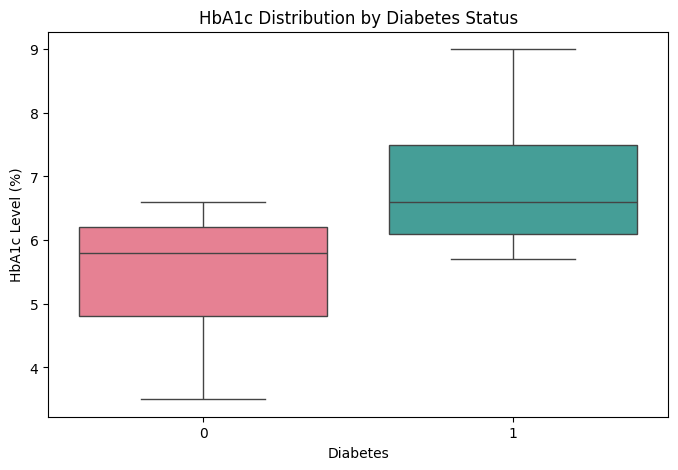

In [86]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='diabetes', y='HbA1c_level', data=df, palette='husl',hue="diabetes", legend=False)
plt.title("HbA1c Distribution by Diabetes Status")
plt.xlabel("Diabetes")
plt.ylabel("HbA1c Level (%)")

**The People With Diabetes Have very high Percentage of Hemoglobin**

# **Data Preprocessing**

**One-Hot Encoding**

In [87]:
df['gender'] = df['gender'].map({'Female': 0, 'Male': 1})
df["smoking_history"] = df["smoking_history"].map({"never": 0 ,"No Info":1, "former": 2, "current": 3,"not current": 4,"ever": 5})

In [88]:
df

gender   age  hypertension  heart_disease  smoking_history    bmi  \
0           0  80.0             0              1                0  25.19   
1           0  54.0             0              0                1  27.32   
2           1  28.0             0              0                0  27.32   
3           0  36.0             0              0                3  23.45   
4           1  76.0             1              1                3  20.14   
...       ...   ...           ...            ...              ...    ...   
99994       0  36.0             0              0                1  24.60   
99996       0   2.0             0              0                1  17.37   
99997       1  66.0             0              0                2  27.83   
99998       0  24.0             0              0                0  35.42   
99999       0  57.0             0              0                3  22.43   

       HbA1c_level  blood_glucose_level  diabetes  
0              6.6                  140         0  
1              6.6                   80         0  
2              5.7                  158         0  
3              5.0                  155         0  
4              4.8                  155         0  
...            ...                  ...       ...  
99994          4.8                  145         0  
99996          6.5                  100         0  
99997          5.7                  155         0  
99998          4.0                  100         0  
99999          6.6                   90         0  

[95344 rows x 9 columns]

**Standardizing the columns**

In [89]:
scaler = StandardScaler()
df[['age', 'bmi', 'blood_glucose_level', 'HbA1c_level']] = scaler.fit_transform(df[['age', 'bmi', 'blood_glucose_level', 'HbA1c_level']])

**Setting the Target and Feature Variables**

In [90]:
x = df.drop(['diabetes'], axis=1)
y = df['diabetes']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# **Data Modeling**

**LogisticRegression Model**

In [91]:
model = LogisticRegression(class_weight='balanced')
model.fit(x_train, y_train)
y_pred_LR = model.predict_proba(x_test)[:, 1]
threshold = 0.43
y_pred_LR = (y_pred_LR >= threshold).astype(int)

In [92]:
model.score(x_test, y_test)

0.8862027374272379

In [93]:
model.score(x_train, y_train)

0.8865290068829892

	            Predicted Negative (Class 0)	   Predicted Positive (Class 1)
Actual Negative (Class 0)   	   True Negative (TN)	        False Positive (FP)  
Actual Positive (Class 1)   	  False Negative (FN)	         True Positive (TP)

In [94]:
confusion_matrix(y_test, y_pred_LR)

array([[14977,  2405],
       [  173,  1514]])

In [95]:
print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

           0       0.99      0.86      0.92     17382
           1       0.39      0.90      0.54      1687

    accuracy                           0.86     19069
   macro avg       0.69      0.88      0.73     19069
weighted avg       0.94      0.86      0.89     19069



**RandomForest Model**

In [96]:
smote = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)


In [97]:
rf = RandomForestClassifier(class_weight='balanced',n_estimators=15,criterion="entropy",max_depth=10,random_state=42)
rf.fit(x_train_smote, y_train_smote)
y_pred_rf = rf.predict(x_test)

In [98]:
rf.score(x_test, y_test)

0.9220200325135036

In [99]:
rf.score(x_train_smote, y_train_smote)

0.9269125389106454

In [113]:
confusion_matrix(y_test, y_pred_rf)

array([[16135,  1247],
       [  240,  1447]])

In [100]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     17382
           1       0.54      0.86      0.66      1687

    accuracy                           0.92     19069
   macro avg       0.76      0.89      0.81     19069
weighted avg       0.95      0.92      0.93     19069



In [101]:
roc_auc = roc_auc_score(y_test, y_pred_rf)
roc_auc

np.float64(0.8929973719994733)

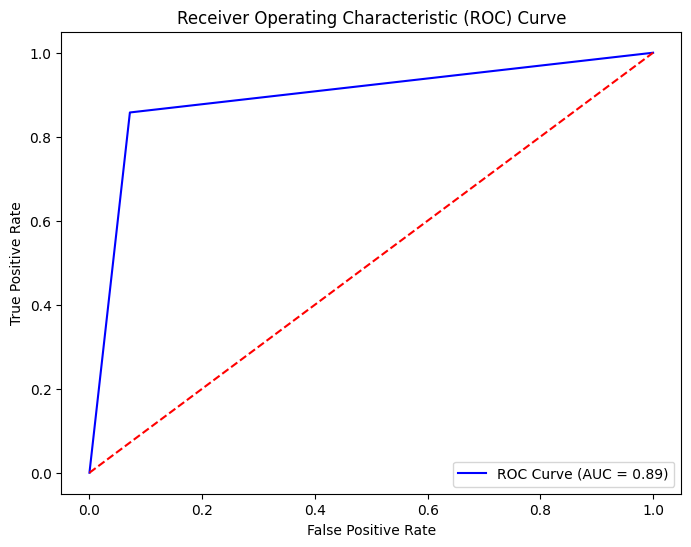

In [102]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_pred_rf):.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

**GradientBoostingClassifier Model**

In [103]:
GB = GradientBoostingClassifier(n_estimators=18,learning_rate=0.9,max_depth=4,random_state=42)
GB.fit(x_train_smote, y_train_smote)
y_pred_GB = GB.predict(x_test)

In [104]:
GB.score(x_test, y_test)

0.9666998793853899

In [105]:
GB.score(x_train_smote, y_train_smote)

0.9752693262182439

In [114]:
confusion_matrix(y_test, y_pred_GB)

array([[17254,   128],
       [  507,  1180]])

In [106]:
print(classification_report(y_test, y_pred_GB))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     17382
           1       0.90      0.70      0.79      1687

    accuracy                           0.97     19069
   macro avg       0.94      0.85      0.88     19069
weighted avg       0.97      0.97      0.96     19069



In [111]:
roc_auc = roc_auc_score(y_test, y_pred_GB)
roc_auc

np.float64(0.8460512844436978)